In [417]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### **Introduction to the Dataset**

The selected dataset provides insights into various factors affecting **wine quality**. The dataset contains **6,497 rows** and **13 columns**, with most variables being numeric. However, one categorical variable, **type**, indicates whether the wine is **red** or **white**.

This dataset was chosen because it offers a rich blend of numerical and categorical variables, making it ideal for exploring relationships, building predictive models, and performing a comprehensive data analysis pipeline.


**1.Data Set Selection**

In [418]:
#Load the data
file_path = 'wine-quality-white-and-red.csv' 
data = pd.read_csv(file_path)

#Display the 5 first rows
display(data.head())
print("The amount of the columns and rows:")

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


The amount of the columns and rows:


In [419]:
display(data.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**2.DATA ANALYSIS**

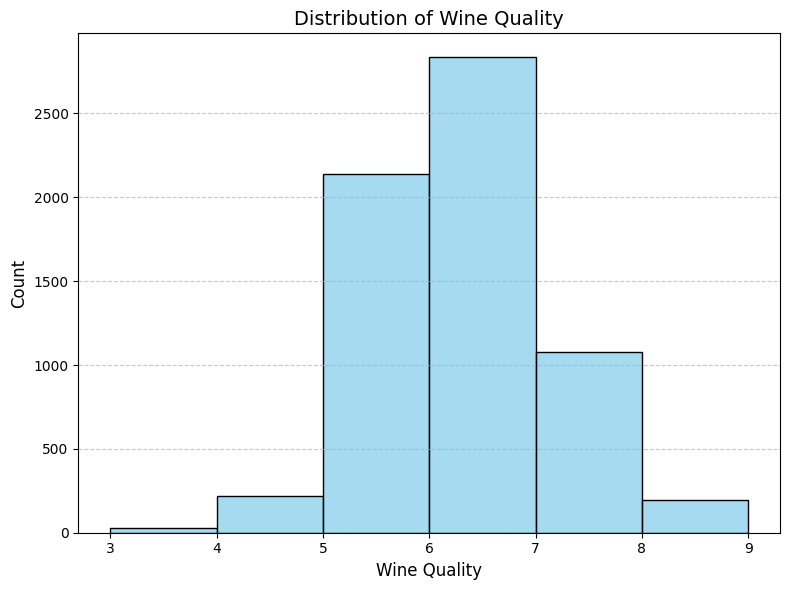

In [420]:
# Visualization 1: Histogram of Quality Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['quality'], kde=False, bins=6, color="skyblue", edgecolor="black")
plt.title('Distribution of Wine Quality', fontsize=14)
plt.xlabel('Wine Quality', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Why this graph?**  
This histogram highlights the overall distribution of wine quality scores in the dataset, providing insight into the target variable's balance. It allows us to assess whether certain quality levels are over- or under-represented, which is critical for understanding any potential bias in the dataset.

**Significance:**  
- Identifies which quality scores are most common.  
- Helps determine whether the target variable is imbalanced, which is crucial when selecting a machine learning model or metric for evaluation.

---

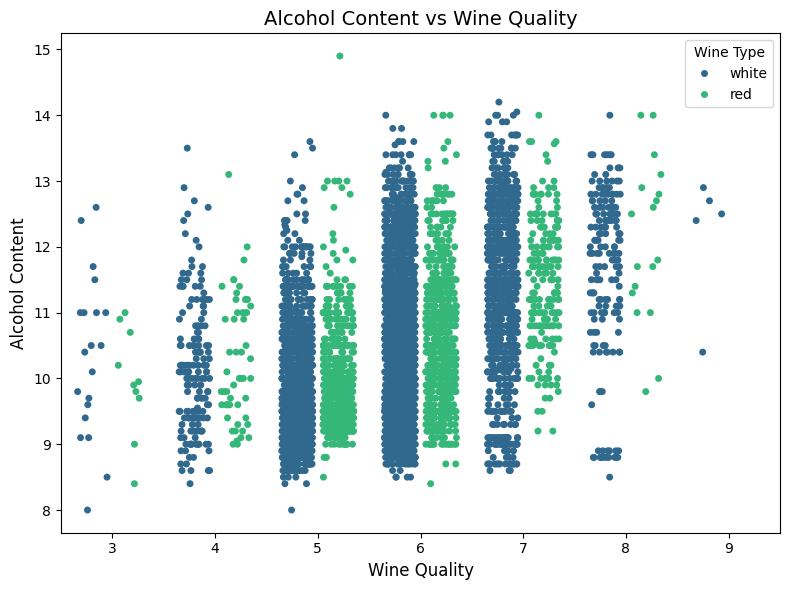

In [421]:
# Visualization 2: Alcohol vs Quality using Stripplot
plt.figure(figsize=(8, 6))
sns.stripplot(x=data['quality'], y=data['alcohol'], hue=data['type'], jitter=0.3, palette='viridis', dodge=True, size=5)
plt.title('Alcohol Content vs Wine Quality', fontsize=14)
plt.xlabel('Wine Quality', fontsize=12)
plt.ylabel('Alcohol Content', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Wine Type')
plt.tight_layout()
plt.show()

**Why this graph?**  
Alcohol content is a critical feature in wine analysis, often influencing quality perception. The stripplot reveals how alcohol content varies across different wine quality levels and allows us to observe clustering or trends.

**Significance:**  
- Demonstrates whether higher alcohol content correlates with higher wine quality.  
- Identifies potential outliers or overlapping patterns, helping us decide if alcohol content is a reliable predictor for wine quality.

---

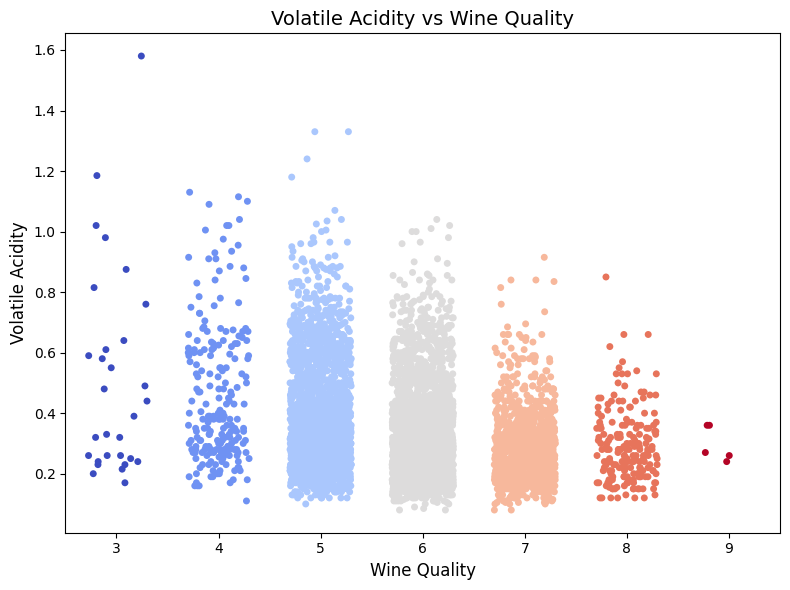

In [422]:
# Visualization 3: Volatile Acidity vs Quality using Stripplot
plt.figure(figsize=(8, 6))
sns.stripplot(
    x=data['quality'], 
    y=data['volatile acidity'], 
    hue=data['quality'],  # Adding hue to differentiate categories
    jitter=0.3, 
    palette='coolwarm', 
    size=5, 
    legend=False  # Hides the legend if not needed
)
plt.title('Volatile Acidity vs Wine Quality', fontsize=14)
plt.xlabel('Wine Quality', fontsize=12)
plt.ylabel('Volatile Acidity', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



**Why this graph?**  
Volatile acidity often affects the taste and aroma of wine, impacting its overall quality. This stripplot allows us to investigate whether higher or lower volatile acidity correlates with quality scores.

**Significance:**  
- Highlights any inverse relationships between volatile acidity and wine quality.  
- Allows us to visually identify whether volatile acidity has a stronger influence on lower or higher wine quality scores.

---

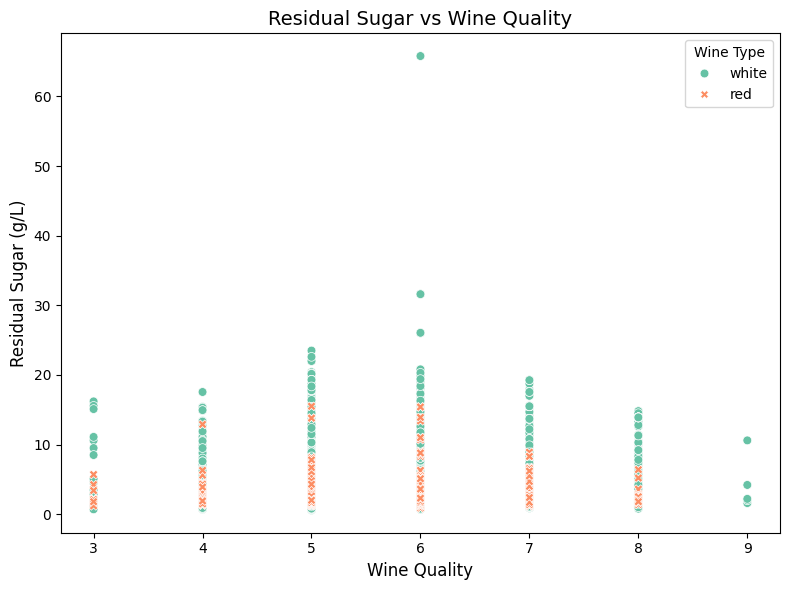

In [423]:
# Visualization 4: Residual Sugar vs Quality using Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['quality'], y=data['residual sugar'], hue=data['type'], style=data['type'], s=40, palette='Set2')
plt.title('Residual Sugar vs Wine Quality', fontsize=14)
plt.xlabel('Wine Quality', fontsize=12)
plt.ylabel('Residual Sugar (g/L)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Wine Type')
plt.tight_layout()
plt.show()

**Why this graph?**  
Residual sugar can significantly influence the taste of wine, particularly for sweet wines. By plotting residual sugar against quality and separating wine types (red and white), we can see how sugar content varies by quality and type.

**Significance:**  
- Distinguishes patterns or clustering of residual sugar between red and white wines.  
- Provides insight into whether residual sugar contributes differently to the perceived quality of red vs. white wines.

---

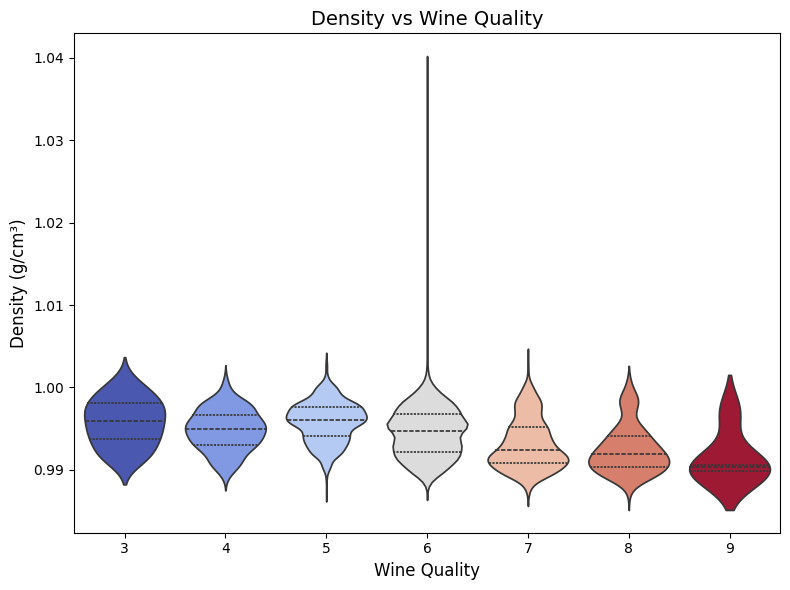

In [424]:
# Visualization 5: Density vs Quality using Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(
    x=data['quality'], 
    y=data['density'], 
    hue=data['quality'],  # Assign the `x` variable to `hue` for proper color mapping
    palette='coolwarm', 
    inner='quartile', 
    dodge=False  # Prevents splitting the violins by hue
)
plt.title('Density vs Wine Quality', fontsize=14)
plt.xlabel('Wine Quality', fontsize=12)
plt.ylabel('Density (g/cm³)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend([],[], frameon=False)  # Optionally hide legend if unnecessary
plt.tight_layout()
plt.show()



**Why this graph?**  
Density is related to sugar and alcohol levels in wine, which are important characteristics that impact quality. The violin plot provides a clear view of the distribution of density across wine quality levels.

**Significance:**  
- Shows the spread of density values for each quality score, highlighting potential differences between quality levels.  
- Combines boxplot and kernel density estimation to present both central tendency and variability.

**3.Basic Model Pipeline**

In [425]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import numpy as np  # NumPy for calculations
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'type' column (categorical) to numerical using Label Encoding
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Prepare features (X) and target (y)
X = data.drop(columns=['quality'])  # Features: all columns except 'quality'
y = data['quality']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_test)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred_test)  # R² Score

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.51
Mean Squared Error (MSE): 0.41
Root Mean Squared Error (RMSE): 0.64
R² Score: 0.42


**4. Error Analysis**

1. On which items the model performs the worst? The best? Why do you think that is?

In [426]:
# Calculate residuals (errors)
residuals = y_test - y_pred_test
# Create a DataFrame for error analysis
error_analysis = X_test.copy()  # Start with features from X_test
error_analysis['True Value'] = y_test.values  # Add actual values
error_analysis['Predicted Value'] = y_pred_test  # Add predicted values
error_analysis['Error'] = residuals.abs()  # Add absolute error

# Sort to find the worst and best performing items
largest_errors = error_analysis.sort_values(by="Error", ascending=False).head(10)
smallest_errors = error_analysis.sort_values(by="Error", ascending=True).head(10)

# Print worst performing items
print("Worst Performing Items (Largest Errors):")
display(data.loc[largest_errors.index])

# Print best performing items
print("\nBest Performing Items (Smallest Errors):")
display(data.loc[smallest_errors.index])

# Combine worst and best predictions
combined_errors = pd.concat([largest_errors, smallest_errors])

# Create labels for worst and best
labels = ['Worst'] * len(largest_errors) + ['Best'] * len(smallest_errors)

# Reset index for consistency
combined_errors = combined_errors.reset_index()
combined_errors['Type'] = labels  # Add a new column to identify Worst/Best

Worst Performing Items (Largest Errors):


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3265,1,4.2,0.215,0.23,5.1,0.041,64.0,157.0,0.99688,3.42,0.44,8.0,3
3770,1,7.4,0.270,0.31,2.4,0.014,15.0,143.0,0.99094,3.03,0.65,12.0,4
1406,1,8.2,0.220,0.36,6.8,0.034,12.0,90.0,0.99440,3.01,0.38,10.5,8
2996,1,6.5,0.350,0.36,0.8,0.034,32.0,111.0,0.98942,3.11,0.50,12.1,8
1219,1,8.2,0.370,0.36,1.0,0.034,17.0,93.0,0.99060,3.04,0.32,11.7,8
6174,0,8.5,0.400,0.40,6.3,0.050,3.0,10.0,0.99566,3.28,0.56,12.0,4
812,1,6.4,0.350,0.28,1.1,0.055,9.0,160.0,0.99405,3.42,0.50,9.1,7
2663,1,8.0,0.130,0.25,1.1,0.033,15.0,86.0,0.99044,2.98,0.39,11.2,8
1034,1,7.9,0.640,0.46,10.6,0.244,33.0,227.0,0.99830,2.87,0.74,9.1,3
598,1,5.9,0.270,0.29,11.4,0.036,31.0,115.0,0.99490,3.35,0.48,10.5,8



Best Performing Items (Smallest Errors):


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3334,1,6.6,0.425,0.25,2.35,0.034,23.0,87.0,0.99082,3.05,0.41,11.4,6
3221,1,6.6,0.240,0.38,12.75,0.034,8.0,74.0,0.99386,3.10,0.57,12.9,6
124,1,6.4,0.130,0.47,1.60,0.092,40.0,158.0,0.99280,3.21,0.36,9.8,6
4077,1,5.7,0.250,0.21,1.50,0.044,21.0,108.0,0.99142,3.30,0.59,11.0,6
2127,1,9.1,0.330,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5
1183,1,6.4,0.260,0.30,2.20,0.025,33.0,134.0,0.99200,3.21,0.47,10.6,6
2966,1,6.6,0.230,0.30,14.90,0.051,33.0,118.0,0.99835,3.04,0.54,9.0,6
1195,1,7.9,0.220,0.45,14.20,0.038,53.0,141.0,0.99920,3.03,0.46,9.2,6
4987,0,7.0,0.620,0.08,1.80,0.076,8.0,24.0,0.99780,3.48,0.53,9.0,5
3169,1,5.7,0.160,0.26,6.30,0.043,28.0,113.0,0.99360,3.06,0.58,9.9,6


### **Analysis of Best and Worst Results**

#### **1. Best Performing Samples (Smallest Errors)**
- **Quality Values**: True and predicted values (mostly 5 or 6) are consistent, aligning with common scores in the dataset.
- **Feature Distribution**:
  - `density`: Typical range (`0.990-0.993`).
  - `alcohol`: Normal values (`9.5%-12.9%`).
  - Moderate `residual sugar` levels (`1.6-14.9`) and balanced acidity.
- **Why the Model Performs Well**:
  - Features fall near the dataset's average, making these samples easier to predict.
  - These combinations are well-represented in the training data.

---

#### **2. Worst Performing Samples (Largest Errors)**
- **Quality Values**: Rare quality values (3 or 8) lead to larger errors.
- **Feature Distribution**:
  - Outliers in `density` (e.g., `0.99688`, `0.98942`) and `alcohol` (e.g., `8.0%`, `12.1%`).
  - High `residual sugar` (e.g., `10.6`, `11.4`) and unusual sulphate levels.
- **Why the Model Performs Poorly**:
  - Outlier features and rare combinations not well-represented in training.
  - Non-linear relationships between features like `alcohol` and `quality`.

2. Is the model mostly overestimating or underestimating? Why?

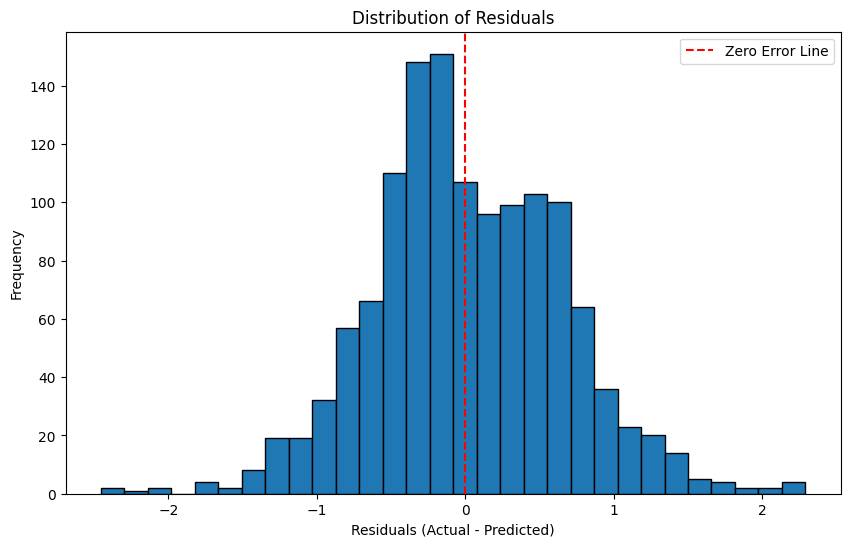

In [427]:
residuals = y_test - y_pred_test

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.axvline(0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.legend()
plt.show()

**Explanation:**
The residuals plot shows the difference between actual and predicted values. Most residuals are centered around 0 (red dashed line), meaning the model has no strong tendency to overestimate or underestimate. The distribution is roughly normal, with most errors between -1 and 1. Outliers with large residuals suggest the model struggles with some specific cases, likely due to outliers or patterns not well-represented in the training data.

3. Are some features sabotaging the model? How?

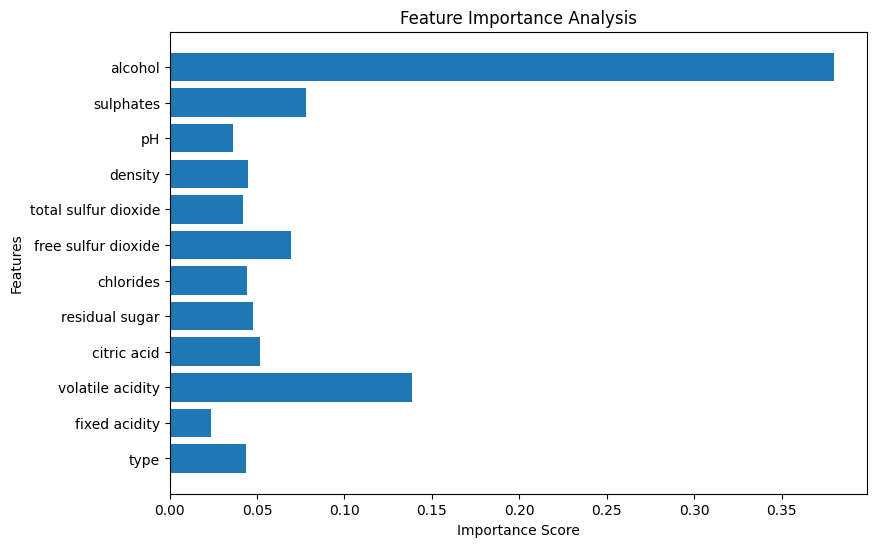

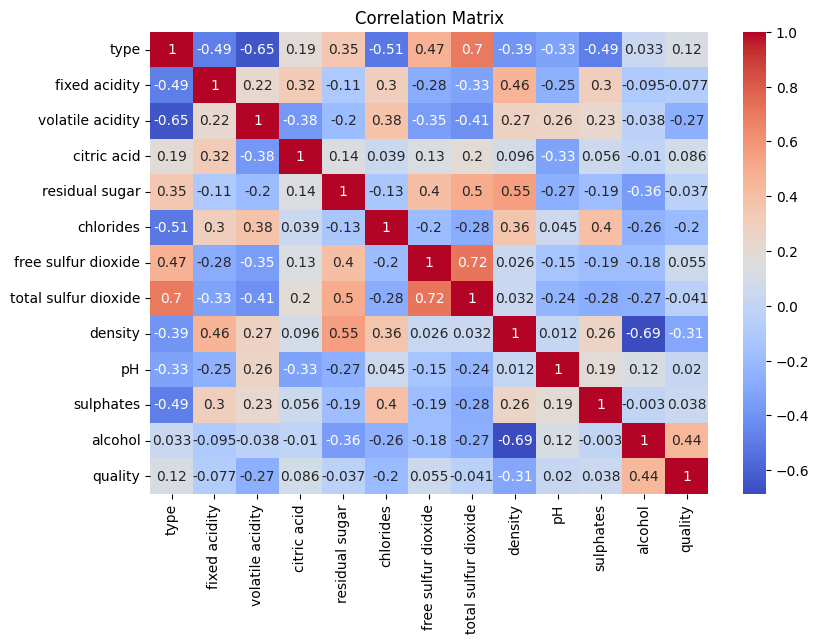

In [428]:
# Feature importance analysis
feature_importances = xgb_model.feature_importances_
plt.figure(figsize=(9, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()

# Correlation matrix to check for multicollinearity
correlation_matrix = data.corr()  # Replace sample_data with the full dataset
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### Analysis of Feature Importance and Correlation Matrix

---

#### **Feature Importance**
 **Key Features**:
   - **Alcohol**: Most influential feature for predicting wine quality.
   - **Sulphates** and **Volatile Acidity**: Significant contributors to the model's performance.
 **Low Importance Features**:
   - **Type**, **Fixed Acidity**, and **Chlorides**: Contribute little to the predictions and could be candidates for removal.

---

#### **Correlation Matrix**
 **Strong Correlations**:
   - **Free Sulfur Dioxide** and **Total Sulfur Dioxide (0.72)**: Redundant; consider removing one.
   - **Density** and **Residual Sugar (0.55)**: Moderate positive relationship.
 **Weak Correlations with Quality**:
   - Features like **pH** and **Chlorides** show minimal impact on wine quality.
 **Negative Correlation**:
   - **Volatile Acidity (-0.27)**: Higher acidity lowers quality.


4. Are you able to find commonalities between the erroneous samples?

In [429]:
# Analyze features of the worst-performing samples
print("Worst Performing Samples Features:")
display(largest_errors.describe())

# Compare these to the dataset overall
print("\nOverall Dataset Features:")
display(data.describe())

# Calculate differences between worst-performing samples and the overall dataset
worst_features = largest_errors.describe()
overall_features = data.describe()

feature_deviation = worst_features.loc['mean'] - overall_features.loc['mean']
print("Feature Deviation (Worst - Overall):")
print(feature_deviation.sort_values(ascending=False))



Worst Performing Samples Features:


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,True Value,Predicted Value,Error
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.900000,7.120000,0.321500,0.330000,4.660000,0.05750,23.100000,119.200000,0.993559,3.151000,0.496000,10.620000,6.100000,5.711958,2.193551
std,0.316228,1.358758,0.139524,0.071024,4.040407,0.06644,17.660062,57.669171,0.003039,0.199357,0.127558,1.453578,2.282786,0.480795,0.149570
min,0.000000,4.200000,0.130000,0.230000,0.800000,0.01400,3.000000,10.000000,0.989420,2.870000,0.320000,8.000000,3.000000,4.857706,2.006680
25%,1.000000,6.425000,0.232500,0.282500,1.100000,0.03400,12.750000,90.750000,0.990685,3.015000,0.402500,9.450000,4.000000,5.518314,2.108924
50%,1.000000,7.650000,0.310000,0.335000,3.750000,0.03500,16.000000,113.000000,0.994225,3.075000,0.490000,10.850000,7.500000,5.815803,2.166401
75%,1.000000,8.150000,0.365000,0.360000,6.675000,0.04775,31.750000,153.500000,0.995470,3.332500,0.545000,11.925000,8.000000,5.970540,2.265799
max,1.000000,8.500000,0.640000,0.460000,11.400000,0.24400,64.000000,227.000000,0.998300,3.420000,0.740000,12.100000,8.000000,6.403127,2.455350



Overall Dataset Features:


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.753886,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Feature Deviation (Worst - Overall):
total sulfur dioxide    3.455426
type                    0.146114
alcohol                 0.128199
citric acid             0.011367
chlorides               0.001466
density                -0.001138
volatile acidity       -0.018166
sulphates              -0.035268
pH                     -0.067501
fixed acidity          -0.095307
residual sugar         -0.783235
free sulfur dioxide    -7.425319
Error                        NaN
Predicted Value              NaN
True Value                   NaN
quality                      NaN
Name: mean, dtype: float64


### Commonalities Between Erroneous Samples

1. **Worst-Performing Samples**:
   - The worst-performing samples show significant deviations in features such as:
     - **Low Residual Sugar**: Much lower than the dataset average.
     - **Free Sulfur Dioxide**: Considerably lower levels than the dataset average.
     - **High Total Sulfur Dioxide**: Higher levels compared to the overall dataset.

2. **Overall Comparison**:
   - Features like `residual sugar` and `sulfur dioxide` show the most significant differences, suggesting that extreme values or underrepresented patterns in these features contribute to errors.

3. **Insights**:
   - Common patterns in erroneous samples:
     - **Low residual sugar** combined with **low free sulfur dioxide** might confuse the model.
     - Outliers or rare feature combinations not well-represented in the training set lead to poor predictions.
